In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


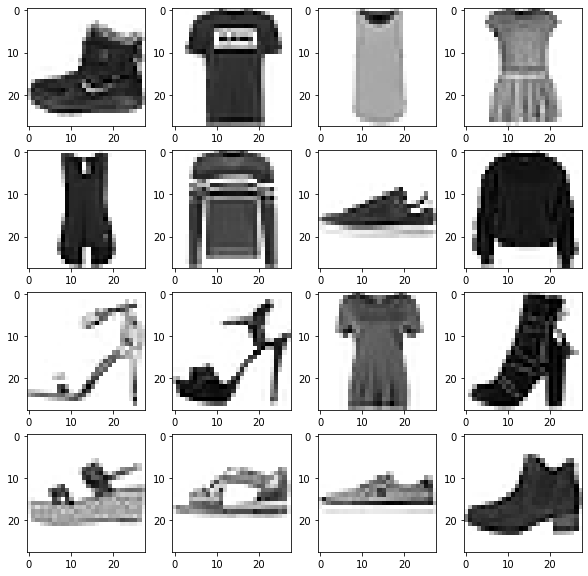

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap = 'binary')
plt.show()

In [5]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [6]:
import numpy as np

x_train = np.reshape(x_train, (60000, 28 * 28))
x_test = np.reshape(x_test, (10000, 28 * 28))

x_train = x_train / 255.
x_test = x_test / 255.

In [11]:
nodes = 64
def create_model(weight_reg=False, dropout_reg=False):
    model = tf.keras.models.Sequential()
    if(weight_reg):
        model.add(
            tf.keras.layers.Dense(
                nodes, activation='relu', input_shape=(784,), 
                kernel_regularizer=tf.keras.regularizers.l2(0.001))
        )
        model.add(
            tf.keras.layers.Dense(
                nodes, activation='relu', 
                kernel_regularizer=tf.keras.regularizers.l2(0.001))
        )
    else:
        model.add(
            tf.keras.layers.Dense(nodes, activation='relu', input_shape=(784,))
        )
        model.add(
            tf.keras.layers.Dense(nodes, activation='relu')
        )
        
    if(dropout_reg):
        model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    model.summary()
    return model

In [16]:
def show_acc(h, E):
    plt.plot(range(E), h.history['accuracy'], label='Training')
    plt.plot(range(E), h.history['val_accuracy'], label='Validation')
    plt.ylim([0.7, 1.0])
    plt.legend()
    plt.show()
    return

In [17]:
simple_log = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda e, l: print(e, end=".")
)

def run_experiment(E=20, weight_reg=False, dropout_reg=False):
    m = create_model(weight_reg, dropout_reg)
    h = m.fit(
        x_train, y_train,
        epochs=E, verbose=False,
        validation_data=(x_test, y_test),
        callbacks=[simple_log]
    )
    show_acc(h, E)
    return

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

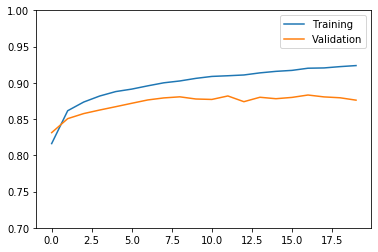

In [19]:
run_experiment()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

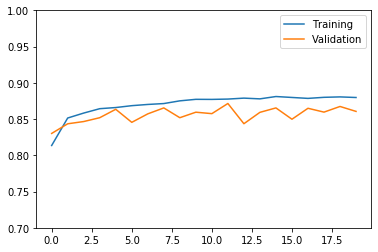

In [20]:
run_experiment(weight_reg=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

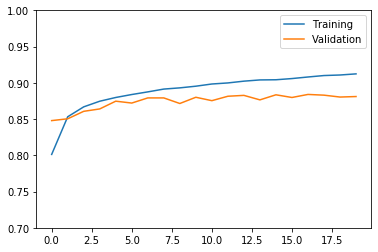

In [21]:
run_experiment(weight_reg=False, dropout_reg=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

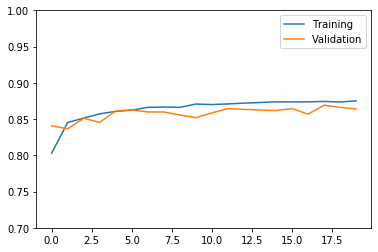

In [22]:
run_experiment(weight_reg=True, dropout_reg=True)

In [ ]:
dropout_reg=